In [1]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
plt.style.use('ggplot')
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("company-stock-movements-2010-2015-incl.csv")
movements = df.iloc[1:,1:].values
companies = df.iloc[1:,0].values
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
9        0                      ConocoPhillips
34       0                            Navistar
36       0                            Novartis
41       0                   Royal Dutch Shell
11       0                             Chevron
42       0                                 SAP
43       0                        Schlumberger
18       0                     GlaxoSmithKline
5        0            British American Tobacco
48       0                               Total
51       0                            Unilever
52       0                       Valero Energy
56       0                               Exxon
45       0                      Sanofi-Aventis
46       1                            Symantec
22       1                                 IBM
31       1                                  3M
57       1                               Xerox
29       1                          MasterCard
58       1                               Yahoo
7        1   

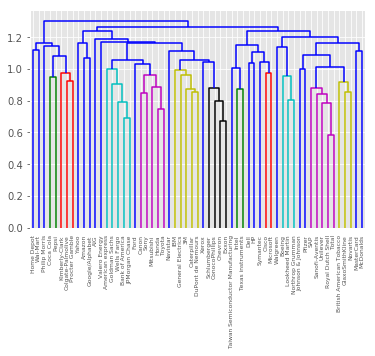

In [3]:
# Import normalize
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='complete')

# Plot the dendrogram
dendrogram(mergings,labels=companies,color_threshold=1,leaf_rotation=90,leaf_font_size=6)
plt.show()


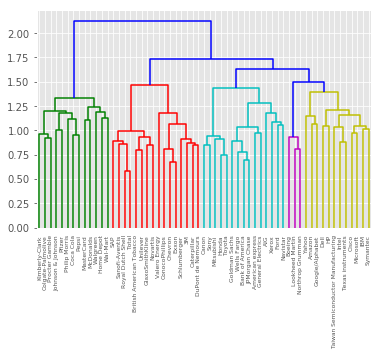

In [4]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements,method='ward')

# Plot the dendrogram
dendrogram(mergings,labels=companies,leaf_rotation=90,leaf_font_size=6)
plt.show()


In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
sc=StandardScaler()
demo = pd.read_csv("company-stock-movements-2010-2015-incl.csv")
demo = demo.iloc[0:,1:]
companies = pd.read_csv("company-stock-movements-2010-2015-incl.csv").iloc[0:,0]
#demo = demo.drop('Unnamed: 0',axis=1)
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
sc=StandardScaler()
demo = pd.DataFrame(normalizer.fit_transform(demo))
#demo = pd.DataFrame(sc.fit_transform(demo))
demo = pd.DataFrame(pca.fit_transform(demo))

In [24]:
pca.explained_variance_ratio_

array([0.08044047, 0.05190932])

In [25]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 16)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 15,random_state=1)
  clusters.fit(demo)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:16]

,num_clusters,cluster_errors
0,1,4.720256
1,2,2.586905
2,3,1.205139
3,4,0.787920
4,5,0.566607
5,6,0.460794
6,7,0.359051
7,8,0.292992
8,9,0.243491
9,10,0.200121


In [26]:
errors = clusters_df.cluster_errors

In [27]:
for i in range(8):
    print(errors[i+1]-errors[i])

-2.1333514827688456
-1.3817653952849356
-0.4172196624148098
-0.22131253231283787
-0.10581295182023764
-0.1017430653514057
-0.0660593410356104
-0.04950046373734718


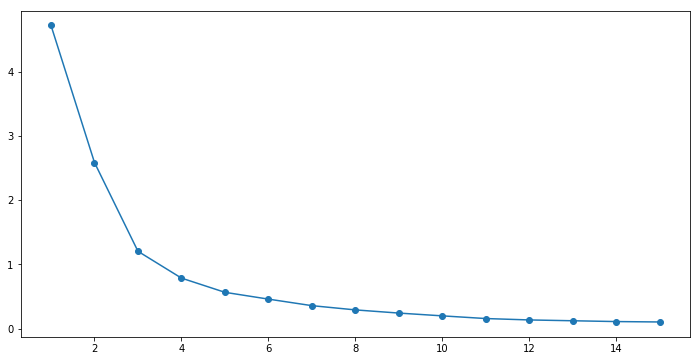

In [28]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.48628384281446013


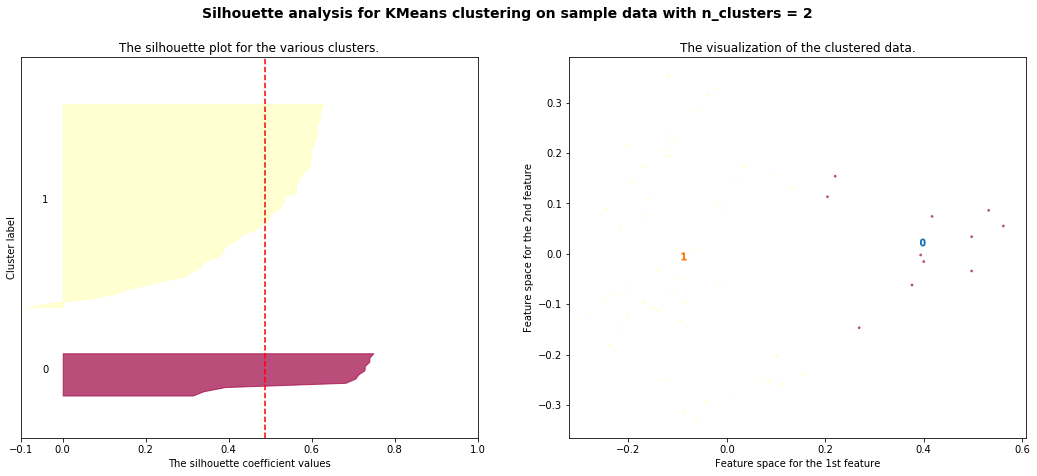

For n_clusters = 3 The average silhouette_score is : 0.49660613869820874


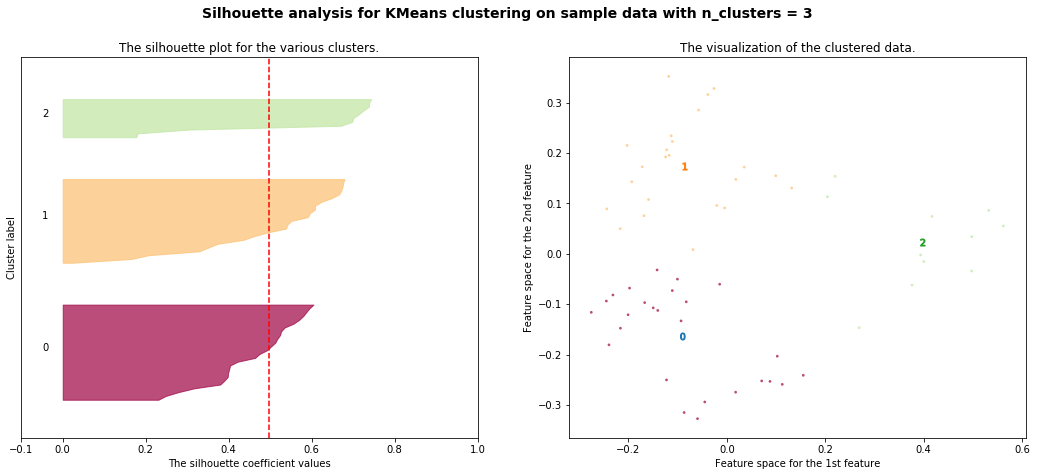

For n_clusters = 4 The average silhouette_score is : 0.49680587321361724


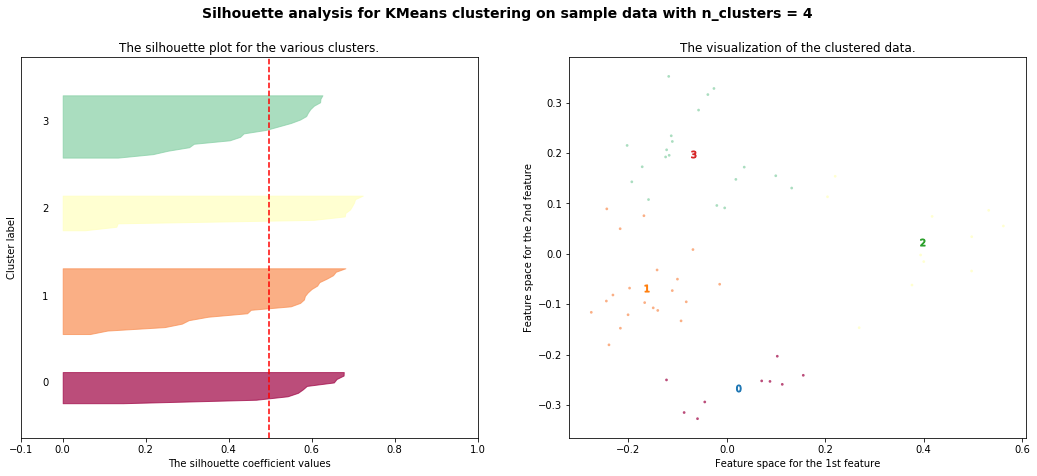

For n_clusters = 5 The average silhouette_score is : 0.5113146792446915


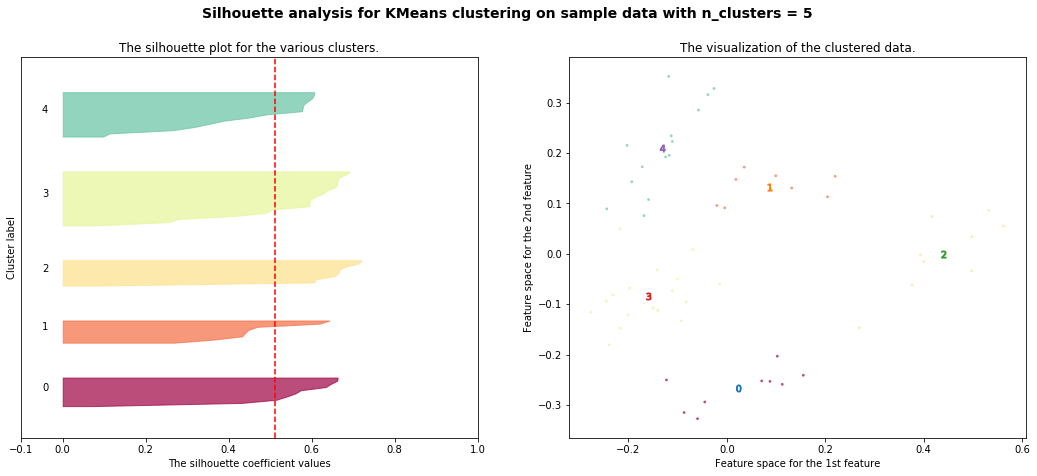

For n_clusters = 6 The average silhouette_score is : 0.4935597637348848


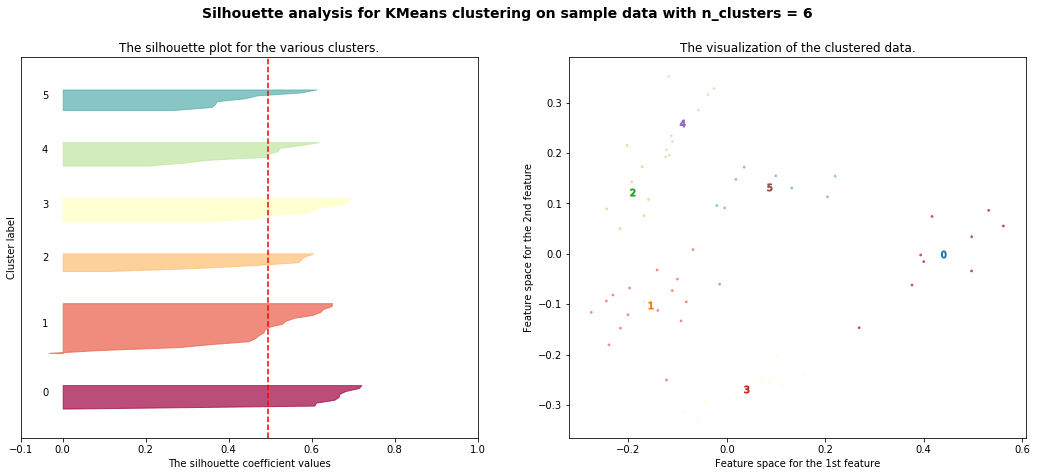

For n_clusters = 7 The average silhouette_score is : 0.4998915154201247


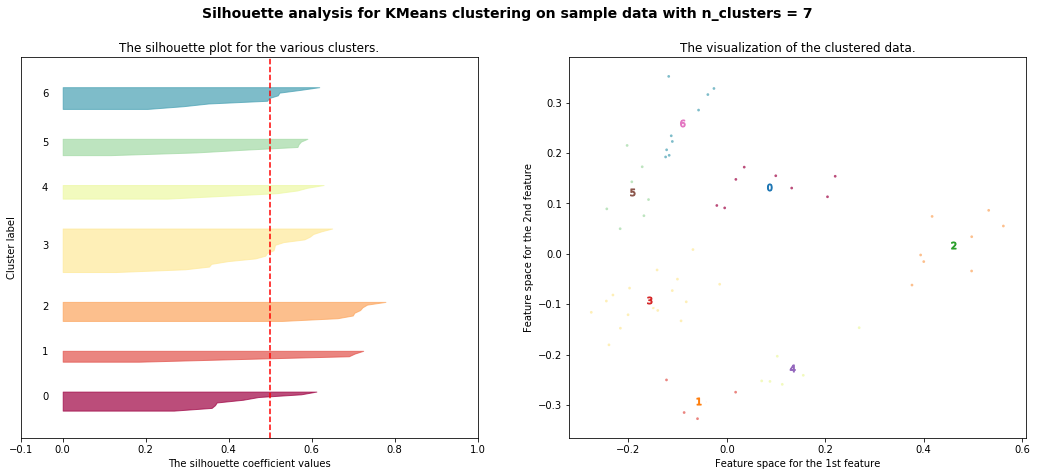

For n_clusters = 8 The average silhouette_score is : 0.47227646125704187


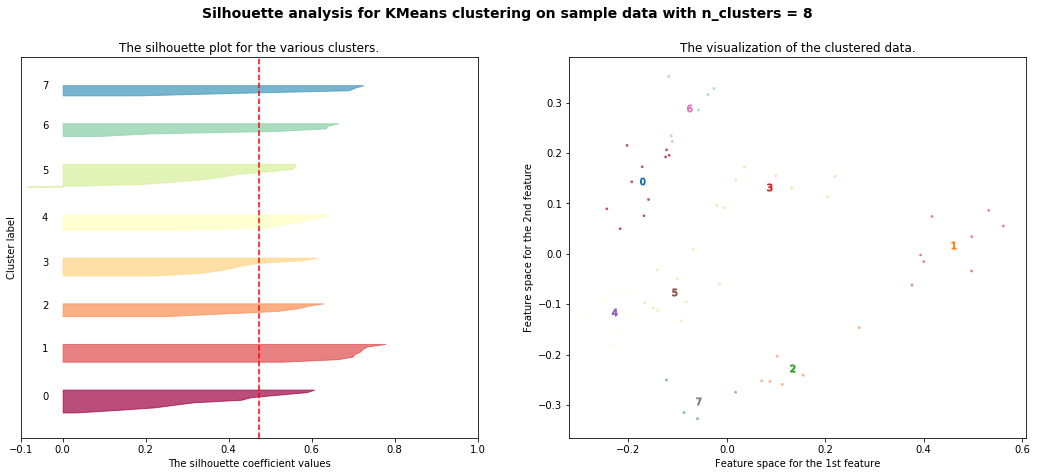

For n_clusters = 9 The average silhouette_score is : 0.47206097464983354


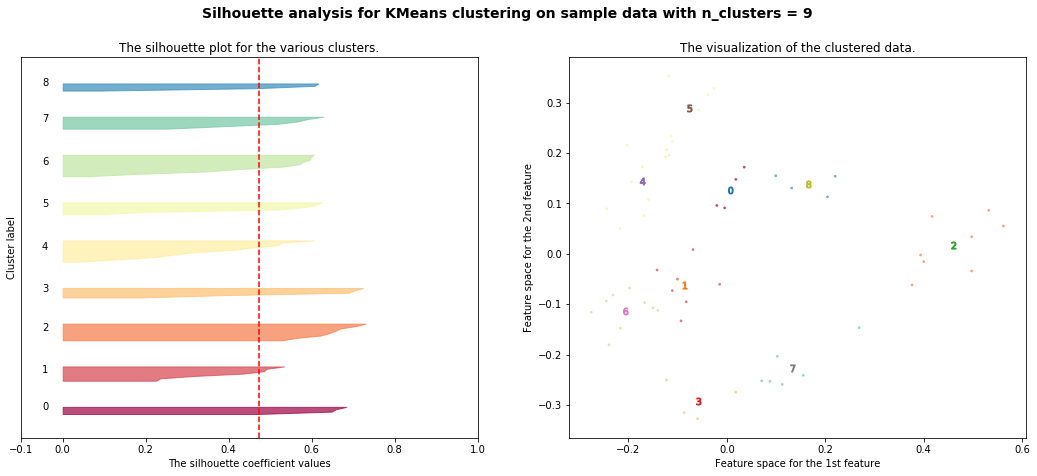

For n_clusters = 10 The average silhouette_score is : 0.49941095032960786


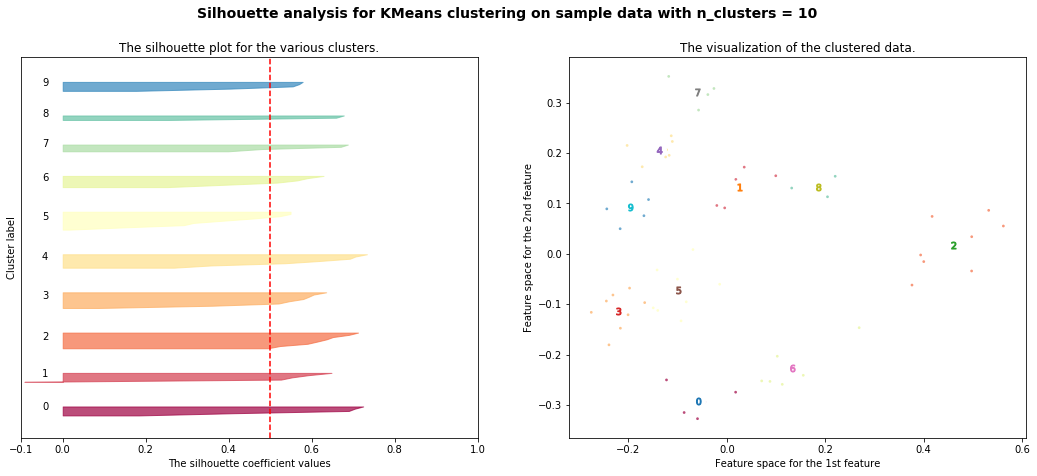

In [29]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = demo.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init = 15,random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [30]:
kmeans = KMeans(n_clusters=13,n_init = 15,random_state=1)
kmeans = kmeans.fit(demo)
labels = kmeans.predict(demo)
centroids = kmeans.cluster_centers_
df = pd.DataFrame({'labels': labels, 'companies': companies})
# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
10       0                      ConocoPhillips
12       0                             Chevron
42       0                   Royal Dutch Shell
49       0                               Total
4        1                              Boeing
23       1                                 IBM
36       1                    Northrop Grumman
30       1                          MasterCard
25       2                   Johnson & Johnson
28       2                           Coca Cola
40       2                      Procter Gamble
56       2                            Wal-Mart
41       2                       Philip Morris
45       3                                Sony
8        3                         Caterpillar
13       3                   DuPont de Nemours
7        3                               Canon
55       3                         Wells Fargo
21       3                               Honda
46       4                      Sanofi-Aventis
37       4   

In [191]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
sc=StandardScaler()
demo = pd.read_csv("company-stock-movements-2010-2015-incl.csv")
demo = demo.iloc[0:,1:]
companies = pd.read_csv("company-stock-movements-2010-2015-incl.csv").iloc[0:,0]
#demo = demo.drop('Unnamed: 0',axis=1)
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
sc=StandardScaler()
demo = pd.DataFrame(normalizer.fit_transform(demo))
#demo = pd.DataFrame(sc.fit_transform(demo))
demo = pd.DataFrame(pca.fit_transform(demo))

In [192]:
from sklearn.cluster import AgglomerativeClustering 

In [193]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [194]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

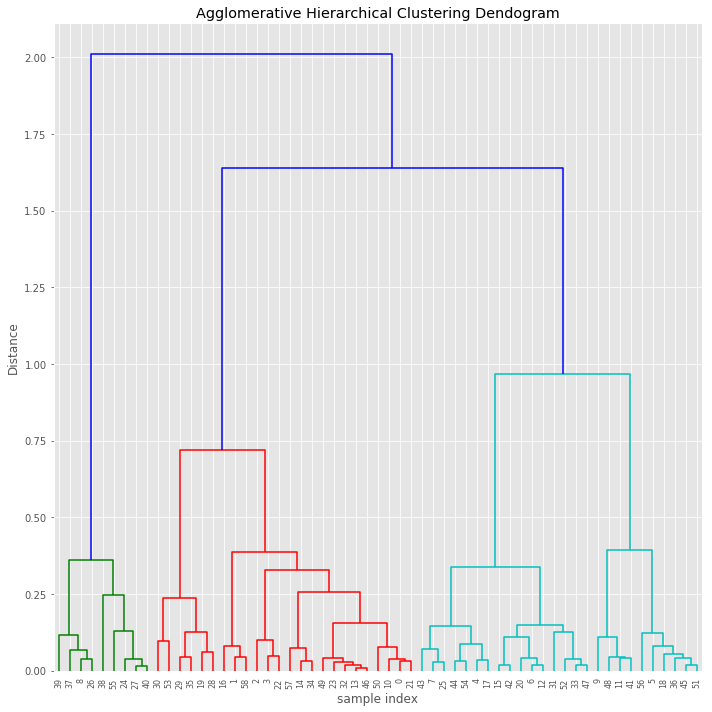

In [195]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90., leaf_font_size=8. )
plt.tight_layout()

In [196]:
model = AgglomerativeClustering(n_clusters=10, affinity='euclidean',  linkage='ward')

In [197]:
model.fit(demo)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=10,
            pooling_func='deprecated')

In [198]:
demo['labels'] = model.labels_
demo.groupby(["labels"]).count()

,0,1
labels,,
0,12,12
1,5,5
2,4,4
3,4,4
4,10,10
5,4,4
6,4,4
7,7,7
8,6,6


In [199]:
demo.head()

,0,1,labels
0,-0.118229,0.353164,5
1,-0.159230,0.107745,0
2,-0.038649,0.315701,5
3,-0.068908,0.008135,4
4,-0.004446,0.091273,9
